In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [16]:
import glob, os
os.chdir("./")
for file in glob.glob("*.csv"):
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [17]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "datag.csv", index=False, encoding='utf-8-sig')

In [68]:
all_data=pd.read_csv("datag.csv")

In [69]:
all_data.head

<bound method NDFrame.head of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0  

In [70]:
all_data=all_data.dropna()
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [71]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [72]:
all_data.head

<bound method NDFrame.head of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0  

In [73]:
# disable chained assignments for errors
pd.options.mode.chained_assignment = None 

all_data['mahina']=all_data['Order Date'].str[0:2]


In [75]:
##del all_data['M_onth']
#del all_data['Month']

In [77]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [78]:
#all_data['mahina'].astype('int32')

In [80]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [83]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mahina,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [86]:
result=all_data.groupby('mahina').sum()#['Sales']

Text(0.5, 0, 'month')

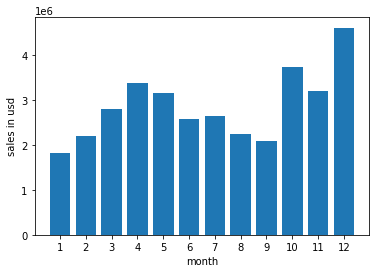

In [91]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel('sales in usd')
plt.xlabel("month")

In [103]:
#del all_data['middle']
all_data[['addno.','city','state']] = all_data['Purchase Address'].str.split(",",expand=True)
#all_data["Purchase Address"].str.split(",")

In [137]:
#del all_data['D_tate']
#all_data['l_tate'] = all_data['State'].str.split(",")[0]#.strip(" ")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mahina,Sales,addno.,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,333 8th St,Los Angeles,CA 90001


In [140]:

all_data['state'] = all_data['state'].str.replace('\d+', '')# for removing numbers from state

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mahina,Sales,addno.,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,917 1st St,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,682 Chestnut St,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,669 Spruce St,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,669 Spruce St,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,333 8th St,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,840 Highland St,Los Angeles,CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,216 Dogwood St,San Francisco,CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,220 12th St,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,511 Forest St,San Francisco,CA


In [141]:
resultwa=all_data.groupby('city').sum()#['Sales']

In [142]:
resultwa

,Quantity Ordered,Price Each,Sales
city,,,
Atlanta,16602,2.779908e+06,2.795499e+06
Austin,11153,1.809874e+06,1.819582e+06
Boston,22528,3.637410e+06,3.661642e+06
Dallas,16730,2.752628e+06,2.767975e+06
Los Angeles,33289,5.421435e+06,5.452571e+06
New York City,27932,4.635371e+06,4.664317e+06
Portland,14053,2.307747e+06,2.320491e+06
San Francisco,50239,8.211462e+06,8.262204e+06
Seattle,16553,2.733296e+06,2.747755e+06


Text(0.5, 0, 'city')

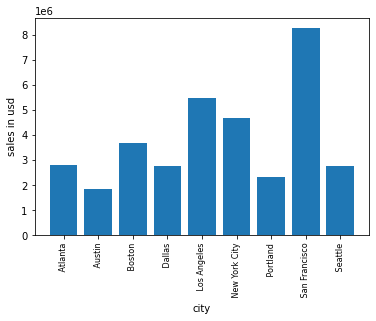

In [150]:
import matplotlib.pyplot as plt
##city=all_data['city'].unique()
city=[city for city,df in all_data.groupby('city')]# so that grouping happens with respect to sales and not random
plt.bar(city,resultwa['Sales'])
plt.xticks(city,rotation='vertical',size=8)
plt.ylabel('sales in usd')
plt.xlabel("city")

In [151]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [155]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

In [156]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mahina,Sales,addno.,city,state,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,917 1st St,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,682 Chestnut St,Boston,MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,669 Spruce St,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,669 Spruce St,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,333 8th St,Los Angeles,CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,840 Highland St,Los Angeles,CA,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,216 Dogwood St,San Francisco,CA,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,220 12th St,San Francisco,CA,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,511 Forest St,San Francisco,CA,17,30


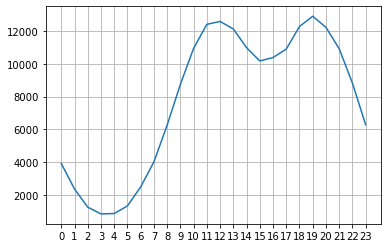

In [158]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]
all_data['Count'] = 1

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()


In [159]:
# so 11 am to 7pm best time for ad placement

In [160]:
all_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [161]:
# finding products that are sold together by same order id

In [162]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [164]:
df["Grouped"]=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = df[['Order ID', 'Grouped']].drop_duplicates()# dropping dupliacte rows

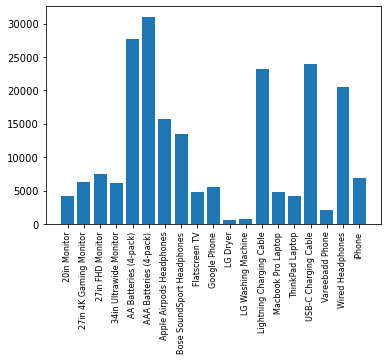

In [165]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-166-47066c2f195f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-166-47066c2f195f>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


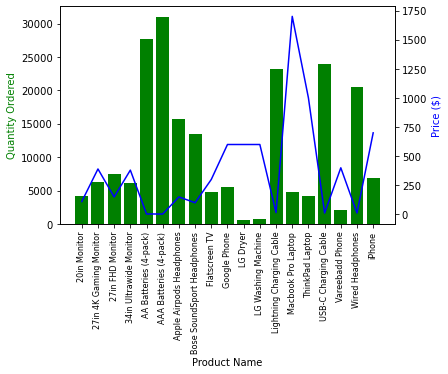

In [166]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()